# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

## Exercise 1 - Answers
**a)** The shape of the expression we are taking the derivative of, $$ (\boldsymbol{a}^T\boldsymbol{x}), $$ is an $1 \times n$ vector multiplied by a $n \times 1$ vector, so an $n \times n$ matrix. We are taking the derivative with respect to $\boldsymbol{x}$, which is has the shape $n \times 1$. The result of the expression is $ \boldsymbol{a}^T $ (will show this in task b), with has the shape $n \times 1$.



**b)** Want to show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T.
$$

We start by defining the function $f$ as $$f(\boldsymbol{x})=\boldsymbol{a}^T\boldsymbol{x}.$$
$\boldsymbol{a}^T$ is a row vector with entries $[a_1, a_2, ..., a_n]$, and $\boldsymbol{x}$ is a column vector with entries $[x_1, x_2, ..., x_n]^T$. 

Multiplying these vectors, we see that 
$$
f(\boldsymbol{x}) =\sum_{i=1}^{n}a_ix_i.
$$

Differentiating componentwise gives
$$
\frac{\partial f}{\partial x_j} = \frac{\partial}{\partial x_j} \sum_{i=1}^{n}a_i x_i = a_i, 
$$
where the last equality occurs because a partial derivative treats all variables other than $x_j$ as constants, making their derivatives zero.

By collecting all partial derivatives, we get:
$$
\frac{\partial (\boldsymbol{a}^T \boldsymbol{x})}{\partial \boldsymbol{x}} = \frac{\partial f}{\partial \boldsymbol{x}} = [a_1, a_2, ... , a_n] = \boldsymbol{a}^T
$$

**c)** Want to show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T).
$$

To make the expression valid, we assume that $\boldsymbol{a}$ is an n-dimensional column vector, and that $\boldsymbol{A}$ is an $n \times n$ matrix.

Multiplying $\boldsymbol{a}^T \boldsymbol{A}$ gives a n-dimensional row vector, where each entry is given by $(\boldsymbol{a}^T \boldsymbol{A})_j = \sum_{i=1}^{n}a_iA_{ij}$. Multiplying this expression with $\boldsymbol{a}$ results in a scalar:
$$
(\boldsymbol{a}^T \boldsymbol{A})\boldsymbol{a} = \sum_{j=1}^{n}(\boldsymbol{a}^T \boldsymbol{A})_j a_j = \sum_{i=1}^{n} \sum_{j=1}^{n} a_i A_{ij} a_j.
$$

We now define the scalar function $f$ by $f(\boldsymbol{a})=\sum_{i=1}^{n} \sum_{j=1}^{n} a_i A_{ij} a_j$

Differentiating componentwise for a fixed $k$ gives:
$$
\frac{\partial f}{\partial a_k} = \frac{\partial}{\partial a_k}\sum_{i=1}^{n} \sum_{j=1}^{n} a_i A_{ij} a_j
$$

In the double sum, the factor $a_i A_{ij} a_j$ depends on $a_k$ if either $i=k$ or $j=k$. Thus, we can split up the sums:
$$
\frac{\partial f}{\partial a_k} = \sum_{j=1}^{n} \frac{\partial}{\partial a_k} (a_k A_{kj} a_j) + \sum_{i=1}^{n} \frac{\partial}{\partial a_k} (a_i A_{ik} a_k)
$$

We differentiate each term, getting $\frac{\partial}{\partial a_k} (a_k A_{kj} a_j) = A_{kj} a_j$ and $\frac{\partial}{\partial a_k} (a_i A_{ik} a_k) = A_{ik} a_i$. So we get the expression:
$$
\frac{\partial f}{\partial a_k} = \sum_{j=1}^{n} A_{kj} a_j + \sum_{i=1}^{n} A_{ik} a_i
$$

We observe that that these sums can be seen as components of matrix-vector products:

$$
\sum_{j=1}^{n}A_{kj}a_j = (\boldsymbol{A}\boldsymbol{a})_k, \sum_{i=1}^{n}A_{ik}a_i = (\boldsymbol{A}^T \boldsymbol{a})_k
$$

Thus, 

$$
\frac{\partial f}{\partial a_k} = (\boldsymbol{A}\boldsymbol{a})_k + (\boldsymbol{A}^T \boldsymbol{a})_k
$$
for each k. When differentiating with respect to the whole vector $\boldsymbol{a}$, we get:

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \frac{\partial f}{\partial \boldsymbol{a}} = (\boldsymbol{A}\boldsymbol{a}) + (\boldsymbol{A}^T \boldsymbol{a}) = (\boldsymbol{A} + \boldsymbol{A}^T) \boldsymbol{a},
$$
which is the transpose of $\boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T)$.


## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

## Exercise 2 - Answers

**a)** We have a function defining the squared error, and we can minimize a function by differentiating, setting the term equal to 0, and solving for the parameters. The error is squared to include both positive and negative contributions, making sure that the negative errors does not cancel out the positive ones. 

**b)** We have that 
$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2 = \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right),
$$
so minimizing the error (finding the optimal parameters $\boldsymbol{\theta}$) can be done by setting one of the factors (in this case, both of the factors) equal to zero:
$$
\boldsymbol{y} - \boldsymbol{X\theta} = 0 \Rightarrow \boldsymbol{X \theta} = \boldsymbol{y}.
$$
Now, assuming that $\boldsymbol{X}$ is invertible, we can solve the matrix equation, which gives the following expression for the optimal value of $\boldsymbol{\theta}$:
$$
\boldsymbol{\theta} = \boldsymbol{X}^{-1} \boldsymbol{y}.
$$

This value of $\boldsymbol{\theta}$ makes the error equal to zero, and since the error is defined as a norm (and is squared), it cannot be negative. Hence, these are the optimal parameters.

**c)** We start by defining/clarifying the dimensions of the terms: $\boldsymbol{x}$ and $\boldsymbol{s}$ are n-dimensional column vectors ($n \times 1$). $\boldsymbol{A}$ is an $n \times n$ matrix. This makes the vector-matrix product $\boldsymbol{As}$ an $n\times 1$ vector. The entries of $\boldsymbol{x}$ are $[x_1, ..., x_n]$, the entries of $\boldsymbol{s}$ are $[s_1, ..., s_n]$, while the $i, j$-th element of $\boldsymbol{A}$ is denoted by $A_{ij}$

By multiplying $\boldsymbol{A}$ and $\boldsymbol{s}$, we get that the $k$-th entry of $\boldsymbol{As}$ is given by: 
$$
(\boldsymbol{As})_k = \sum_{j=1}^{n}A_{kj}s_j.
$$

Further,
$$
(\boldsymbol{x}-\boldsymbol{As})_k = x_k - \sum_{j=1}^{n}A_{kj}s_j
$$

Since $(\boldsymbol{x}-\boldsymbol{As})^T$ is an $1 \times n$ vector, and $(\boldsymbol{x}-\boldsymbol{As})$ is an $n \times 1$ vector, its product becomes a scalar, given by:
$$
\sum_{k=1}^{n} (x_k - \sum_{j=1}^{n}A_{kj}s_j)^2
$$

Now, we differentiate with respect to a given component $s_m$:
$$
\frac{\partial}{\partial s_m} \sum_{k=1}^{n} (x_k - \sum_{j=1}^{n}A_{kj}s_j)^2
$$
Chain rule gives: 
$$
\frac{\partial}{\partial s_m} \sum_{k=1}^{n} (x_k - \sum_{j=1}^{n}A_{kj}s_j)^2 = \sum_{k=1}^{n}2(x_k-\sum_{j=1}^{n}A_{kj}s_j)*\frac{\partial}{\partial s_m} (x_k - \sum_{j=1}^{n}A_{kj}s_j)
$$

We see that the second factor of the expression reduces:
$$
\frac{\partial}{\partial s_m} (x_k - \sum_{j=1}^{n}A_{kj}s_j) = -A_{km}
$$

Now we have:
$$
\frac{\partial}{\partial s_m} (\boldsymbol{x}-\boldsymbol{As})^T(\boldsymbol{x}-\boldsymbol{As}) = -2\sum_{k=1}^{n}(x_k-\sum_{j=1}^{n}A_{kj}s_j)A_{km}
$$

We recognize the sum as $(As)_k$:
$$
... = -2\sum_{k=1}^{n}(x_k-(As)_k)A_{km},
$$
which is the $m$-th component of the vector $-2(\boldsymbol{x}-\boldsymbol{As})^T\boldsymbol{A}$

So now we have shown that:
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**d)** We still want to minimize the expression:
$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2 = \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right),
$$
but now we dont assume that $\boldsymbol{X}$ is invertible. Instead, we differentiate:
$$
\frac{\partial (\boldsymbol{y}-\boldsymbol{X\theta})^T(\boldsymbol{y}-\boldsymbol{X\theta})}{\partial \boldsymbol{\theta}} = -2(\boldsymbol{y}-\boldsymbol{X\theta})^T\boldsymbol{X}, 
$$
by using the result in **c)**. Setting this derivative equal to zero, yields the following equation, which is solved using matrix calculations:
$$
-2(\boldsymbol{y}-\boldsymbol{X\theta})^T\boldsymbol{X}=0
$$
$$
(\boldsymbol{y}-\boldsymbol{X\theta})\boldsymbol{X}=0
$$
$$
(\boldsymbol{y}^T-(\boldsymbol{X\theta})^T)\boldsymbol{X}=0
$$
$$
\boldsymbol{y}^T\boldsymbol{X}-\boldsymbol{\theta}^T\boldsymbol{X}^T\boldsymbol{X}=0
$$
$$
\boldsymbol{\theta}^T = (\boldsymbol{y}^T\boldsymbol{X})(\boldsymbol{X}^T\boldsymbol{X})^{-1},
$$
under the assumption that $\boldsymbol{X}^T\boldsymbol{X}$ is invertible.

Transposing both sides gives:
$$
\boldsymbol{\hat{\theta}_{OLS}} = ((\boldsymbol{y}^T\boldsymbol{X})(\boldsymbol{X}^T\boldsymbol{X})^{-1})^T = ((\boldsymbol{X}^T\boldsymbol{X})^{-1})^T(\boldsymbol{y}^T\boldsymbol{X})^T = ((\boldsymbol{X}^T\boldsymbol{X})^T)^{-1}(\boldsymbol{X}^T\boldsymbol{y}) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{X}^T\boldsymbol{y})
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [321]:
import numpy as np


In [322]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [323]:
X = np.zeros((n, 3))
# Intercept column
X[:, 0] = np.ones((n))
# Income
X[:, 1] = income

# Children
X[:, 2] = children

#print(X)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [324]:
def OLS_parameters(X, y):
    return np.linalg.pinv((X.T@X))@(X.T@y)

y=spending
beta = OLS_parameters(X, y)
#print(beta)

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [325]:
np.random.seed = 2018
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [326]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = np.ones((n))
    for i in range(1, p+1):
        X[:, i]=x**i 
    return X

X = polynomial_features(x, 5)
#print(X)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [327]:
beta = OLS_parameters(X, y)
#print(beta)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [328]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [329]:
# Feature matrices for training and testing data
x_train = polynomial_features(X_train, 5)
x_test = polynomial_features(X_test, 5)

# Fitting model on training data
beta_train = OLS_parameters(x_train, y_train)

# Predicting
y_pred_train = x_train@beta_train
y_pred_test = x_test@beta_train

# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE_training = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

# Printing results
print("Mean Squared Error, training data: ", np.round(MSE_training, 4))
print("Mean Squared Error, testing data: ", np.round(MSE_test, 4))

Mean Squared Error, training data:  0.0134
Mean Squared Error, testing data:  0.0159


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

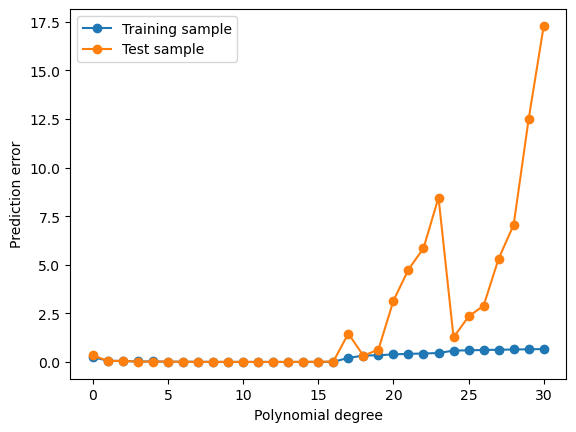

In [330]:


# Matrix for storing MSE data. First column MSE_training, second column MSE_testing
# Each row is a polynomial degree, from 2 to 10

poly_deg_min = 0
poly_deg_max = 30

MSE_data = np.zeros((poly_deg_max - poly_deg_min + 1, 2))

for i in range(poly_deg_min, poly_deg_max + 1):
    X_train_poly = polynomial_features(X_train, i)
    X_test_poly = polynomial_features(X_test, i)
    beta = OLS_parameters(X_train_poly, y_train)
    y_pred_train = X_train_poly@beta
    y_pred_test = X_test_poly@beta
    
    MSE_data[i-poly_deg_min, 0] = mean_squared_error(y_train, y_pred_train)
    MSE_data[i-poly_deg_min, 1] = mean_squared_error(y_test, y_pred_test)

# Plotting
poly_deg = np.arange(poly_deg_min, poly_deg_max + 1, 1)
mse_training_data = MSE_data[:, 0]
mse_test_data = MSE_data[:, 1]

import matplotlib.pyplot as plt

plt.plot(poly_deg, MSE_data[:,0], marker="o", label="Training sample")
plt.plot(poly_deg, MSE_data[:,1], marker="o", label="Test sample")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Prediction error")
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

The graph shows that one can make a complex model that fits "perfectly" with the training data, but that this model causes a huge prediction error when the model is used on the test data. This is because you can fit a polynomial of degree n to n data points such that the function hits every data point. But this model does not generalize anything from the training data, so the machine has "learned" nothing. So when the model is faced with new data (testing data), it misses (overfitting).

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [331]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)
my_X = polynomial_features(x, 5)

x=x.reshape(-1, 1)
poly_features = PolynomialFeatures(degree=5)
sklearn_X = poly_features.fit_transform(x)

are_close = np.allclose(my_X, sklearn_X, rtol=1e-12, atol=1e-12)
print(are_close)



True


**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [332]:
my_beta = OLS_parameters(my_X, y)

poly_model = LinearRegression(fit_intercept = False).fit(sklearn_X, y)
sklearn_beta = poly_model.coef_

are_close = np.allclose(my_beta, sklearn_beta, rtol=1e-12, atol=1e-12)

print(are_close)

True
